In [7]:
from decouple import config
from mvpa_functions import load_pickle
import nilearn.plotting as nplot
import os

In [12]:
frem_path = config('frem')
frem_dictionary = {'ADOS_com_soc': {}, 
                   'ADOS_Communication': {}, 
                   'ADOS_Creativity': {},
                   'ADOS_Interaction': {}, 
                   'ADOS_sterotyped_and_repetititve': {} 
                   }
for domain in frem_dictionary:
    frem_dictionary[domain]['frem'] = load_pickle(os.path.join(frem_path, 'pickle', domain ))
    frem_dictionary[domain]['image'] = os.path.join(frem_path, 'images', f'{domain}.nii.gz' )

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/sklearn/base.py:288: UserWarning: Trying to unpickle estimator SVR from version 1.2.1 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


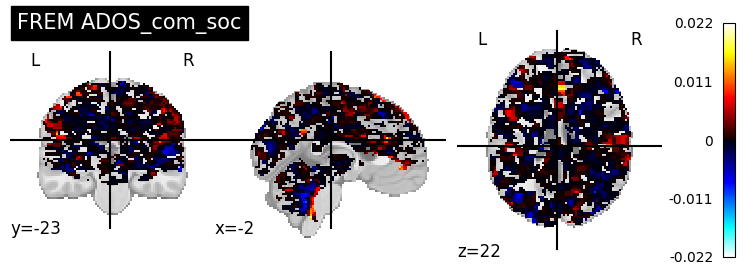

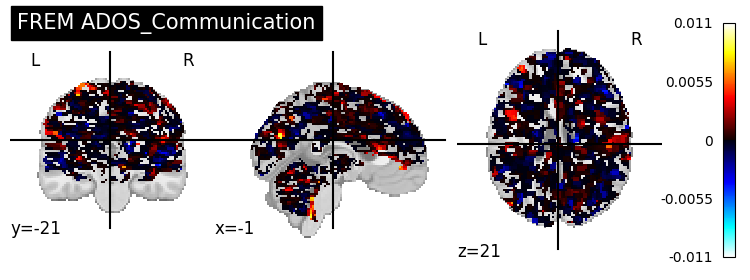

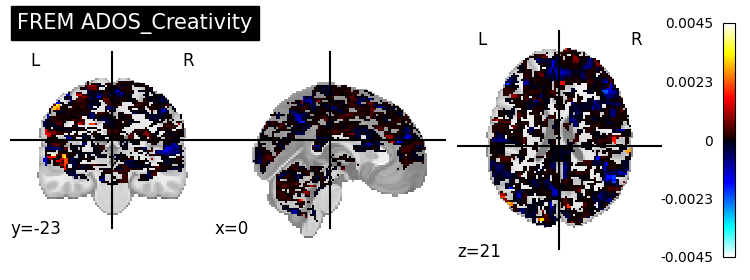

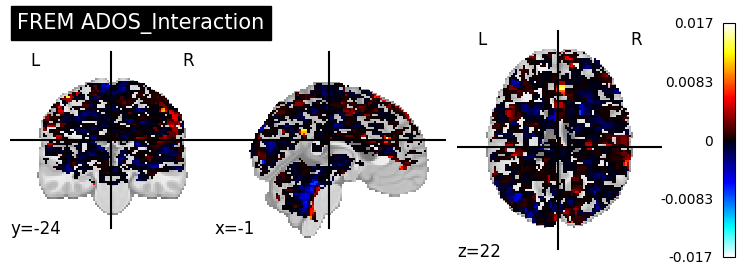

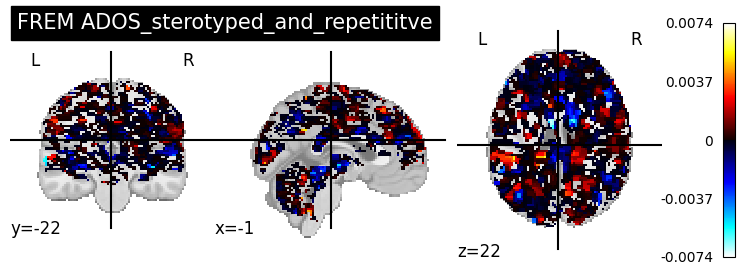

In [20]:
for domain in frem_dictionary:
    nplot.plot_stat_map(
        frem_dictionary[domain]['image'],
        title=f"FREM {domain}",
        threshold=0.0
    )